In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_path = "../dataset/train.tsv"
df = pd.read_csv(dataset_path, sep="\t")

/tmp/ipykernel_84125/4034095424.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path, sep="\t")


In [3]:
# Remove all columns except 'path', 'sentence', 'age', 'gender', 'accents'
df = df[['path', 'sentence', 'age', 'gender', 'accents']]
# Filter out rows where 'accents' is NaN or empty
df_filtered = df[df['accents'].notna() & (df['accents'] != '') & df['gender'].notna() & df['age'].notna()]
print(df_filtered.head())
print(df_filtered.count())

                             path  \
39   common_voice_en_38272356.mp3   
40   common_voice_en_38272405.mp3   
41   common_voice_en_38272432.mp3   
119  common_voice_en_17869966.mp3   
135  common_voice_en_21061116.mp3   

                                              sentence       age  \
39   Canoes from all other islands are landing thei...  twenties   
40    You’re doing the exact thing this post is about.  twenties   
41   The first person who steps over these buried h...  twenties   
119       That’s what you get for testing my patience.     teens   
135  The labs has since been renamed to "Cybermedia...  twenties   

             gender                                            accents  
39   male_masculine  England English,India and South Asia (India, P...  
40   male_masculine  England English,India and South Asia (India, P...  
41   male_masculine  England English,India and South Asia (India, P...  
119  male_masculine                              United States English  
135

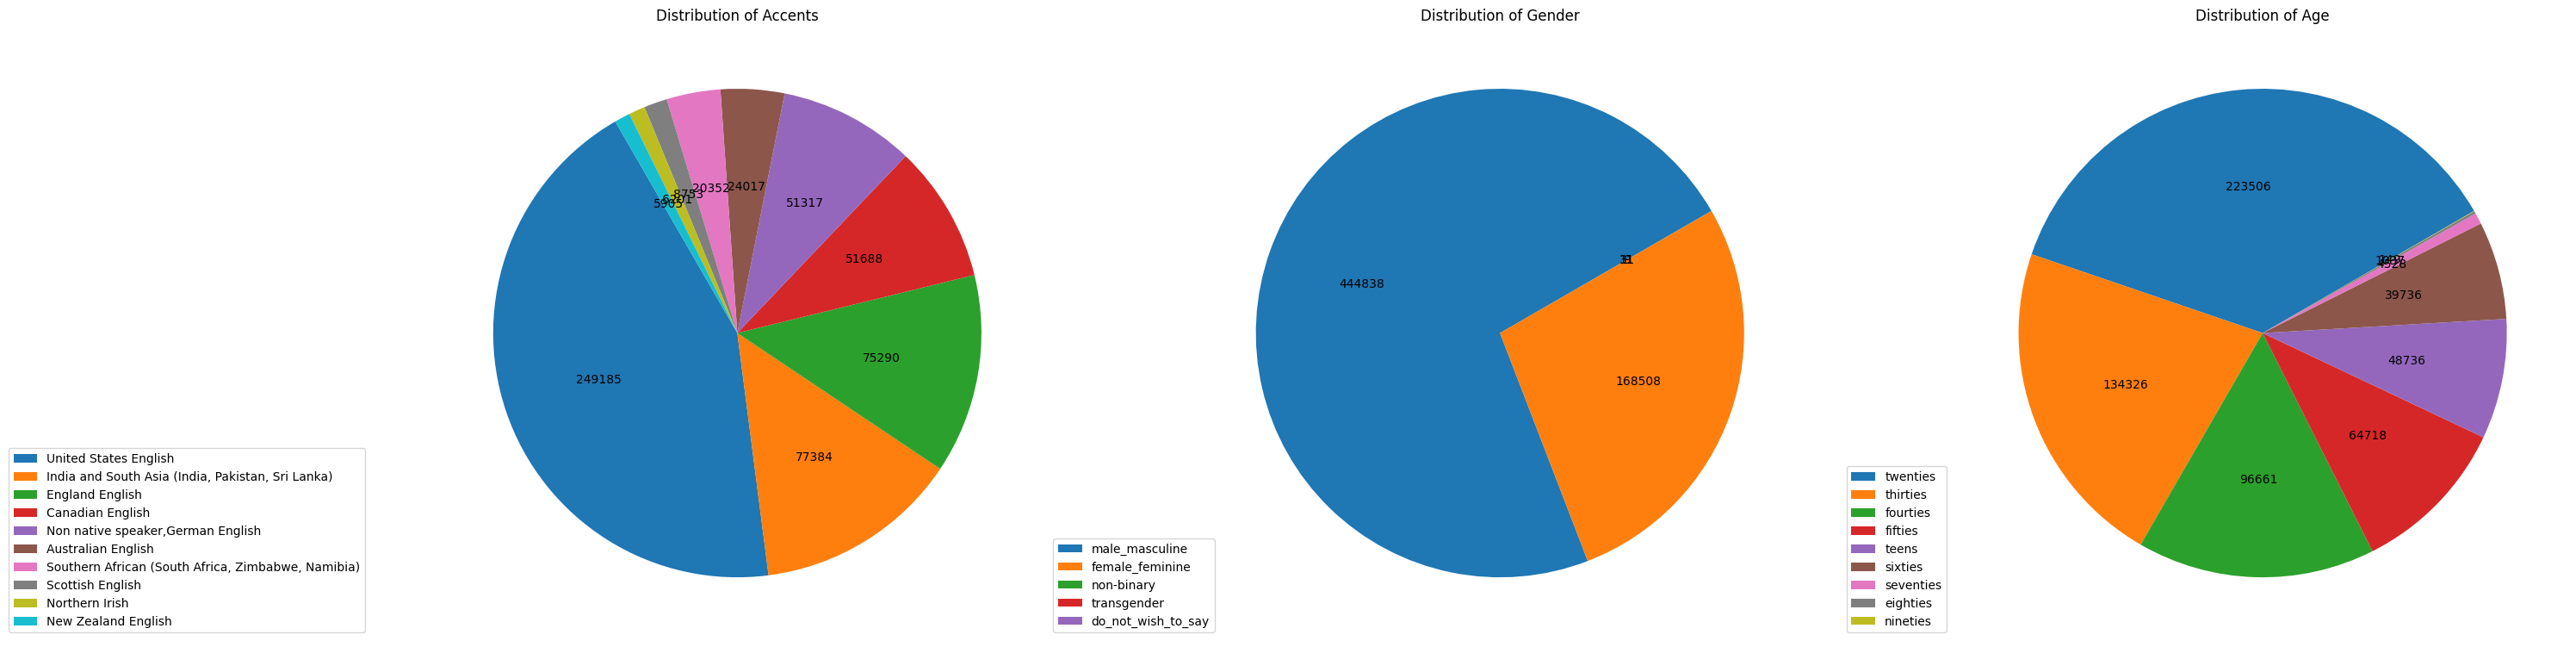

In [4]:
# Chart the distribution of accents in a pie chart
# Create a function to display the actual counts
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

top_values = 10

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(1,3, figsize=(30,20))

# Accents distribution
accents_value_counts = df_filtered['accents'].value_counts()
axs[0].pie(accents_value_counts[0:top_values],              
             autopct=make_autopct(accents_value_counts[0:top_values]), 
             startangle=120)
axs[0].legend(accents_value_counts.index[0:top_values], loc='lower right', bbox_to_anchor=(-0.1, 0))
axs[0].set_title("Distribution of Accents")

# Gender distribution
gender_value_counts = df_filtered['gender'].value_counts()
axs[1].pie(gender_value_counts[0:top_values],              
              autopct=make_autopct(gender_value_counts[0:top_values]),
              startangle=30)
axs[1].legend(gender_value_counts.index[0:top_values], loc='lower center', bbox_to_anchor=(-0.1, 0))
axs[1].set_title("Distribution of Gender")

# Age distribution
age_value_counts = df_filtered['age'].value_counts()
axs[2].pie(age_value_counts[0:top_values],              
              autopct=make_autopct(age_value_counts[0:top_values]),
              startangle=30)
axs[2].legend(age_value_counts.index[0:top_values], loc='lower center', bbox_to_anchor=(-0.1, 0))
axs[2].set_title("Distribution of Age")

plt.tight_layout()
plt.show()

In [5]:
# insert a new row into df_filtered
new_row = pd.DataFrame({
  "path": ["sample.wav"],
  "sentence": ["Please call Stella, ask her to bring these things to the store"],
  "age": ["twenties"],
  "gender": ["male_masculine"],
  "accents": ["England English"]
})
df_filtered = pd.concat([new_row, df_filtered], ignore_index=True)
df_filtered.tail()

,path,sentence,age,gender,accents
613393,common_voice_en_40183478.mp3,He has six sons and a daughter.,fifties,male_masculine,"Non native speaker,German English"
613394,common_voice_en_40183482.mp3,The highway is named after a popular former Qu...,fifties,male_masculine,"Non native speaker,German English"
613395,common_voice_en_40183484.mp3,"Sing Monkey, Sing!",fifties,male_masculine,"Non native speaker,German English"
613396,common_voice_en_40183486.mp3,"An adjoining conservation area, Eastcote Park,...",fifties,male_masculine,"Non native speaker,German English"
613397,common_voice_en_40183490.mp3,"The family moved to Berlin, where Henrik went ...",fifties,male_masculine,"Non native speaker,German English"


In [6]:
df_filtered.to_csv("../dataset/train_clean.csv", index=False)